# This script adds the initial result of F0 to the True Valleys / Peaks results

### **Load the required libraries**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Load the csv file using pd.read_csv**

In [84]:
data = pd.read_csv('~/Downloads/Fluorometer/Basil_Trial/01-07-22/01-07-2022_05_00_peaks_valleys_2.csv')

### **Inspect the Dataset**

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   True Valleys  29 non-null     float64
 1   Peaks         29 non-null     float64
dtypes: float64(2)
memory usage: 592.0 bytes


In [86]:
data.head()

,True Valleys,Peaks
0,0.000000,143.494007
1,0.000000,135.929639
2,48.864551,134.303128
3,48.384440,135.013913
4,48.253145,135.334954


### **Eliminate the first two rows of the dataset**

In [87]:
data2 = data.iloc[2:]
data2.head()

,True Valleys,Peaks
2,48.864551,134.303128
3,48.384440,135.013913
4,48.253145,135.334954
5,48.478275,136.495993
6,48.875127,137.118678


### **Add the F0 value to the dataset columns**

In [88]:
new_value = data2 + 5.5
new_value.head()

,True Valleys,Peaks
2,54.364551,139.803128
3,53.884440,140.513913
4,53.753145,140.834954
5,53.978275,141.995993
6,54.375127,142.618678


### **Create a new column called PSII and add the values of the formula Fq'/Fm' or PSII = (last_peak - last_valley) / last_peak**

In [89]:
new_value['PSII'] = (new_value['Peaks']-new_value['True Valleys'])/new_value['Peaks'] 
new_value.head()

,True Valleys,Peaks,PSII
2,54.364551,139.803128,0.611135
3,53.884440,140.513913,0.616519
4,53.753145,140.834954,0.618325
5,53.978275,141.995993,0.619861
6,54.375127,142.618678,0.618738


### **We need to find the value of the first peak which we deleted in step 4 so, we revert back to the original 'data' dataframe, add F0, then delete all the rows except the first one.**

In [90]:
fixed_value = data['Peaks']
fixed_value = fixed_value + 5.5
fixed_value = fixed_value.iloc[:-28]
fixed_value.info()
fixed_value.head()

<class 'pandas.core.series.Series'>
RangeIndex: 1 entries, 0 to 0
Series name: Peaks
Non-Null Count  Dtype  
--------------  -----  
1 non-null      float64
dtypes: float64(1)
memory usage: 136.0 bytes


0    148.994007
Name: Peaks, dtype: float64

### **Let's calculate NPQ based on the formula NPQ = (first_peak - last_peak) / last_peak**

In [91]:
new_value['NPQ'] = (fixed_value[0] - new_value['Peaks'])/new_value['Peaks']
new_value.head()

,True Valleys,Peaks,PSII,NPQ
2,54.364551,139.803128,0.611135,0.065742
3,53.884440,140.513913,0.616519,0.060351
4,53.753145,140.834954,0.618325,0.057933
5,53.978275,141.995993,0.619861,0.049283
6,54.375127,142.618678,0.618738,0.044702


### **Let's calculate now the relative Electron Transport Rate (rETR) using PSII x 284 x 0.5 x 0.84**

In [92]:
new_value['rETR'] = new_value['PSII'] * 284 * 0.5 * 0.84
new_value.head()

,True Valleys,Peaks,PSII,NPQ,rETR
2,54.364551,139.803128,0.611135,0.065742,72.896177
3,53.884440,140.513913,0.616519,0.060351,73.538366
4,53.753145,140.834954,0.618325,0.057933,73.753837
5,53.978275,141.995993,0.619861,0.049283,73.936970
6,54.375127,142.618678,0.618738,0.044702,73.803032


### **Plot NPQ against rETR**

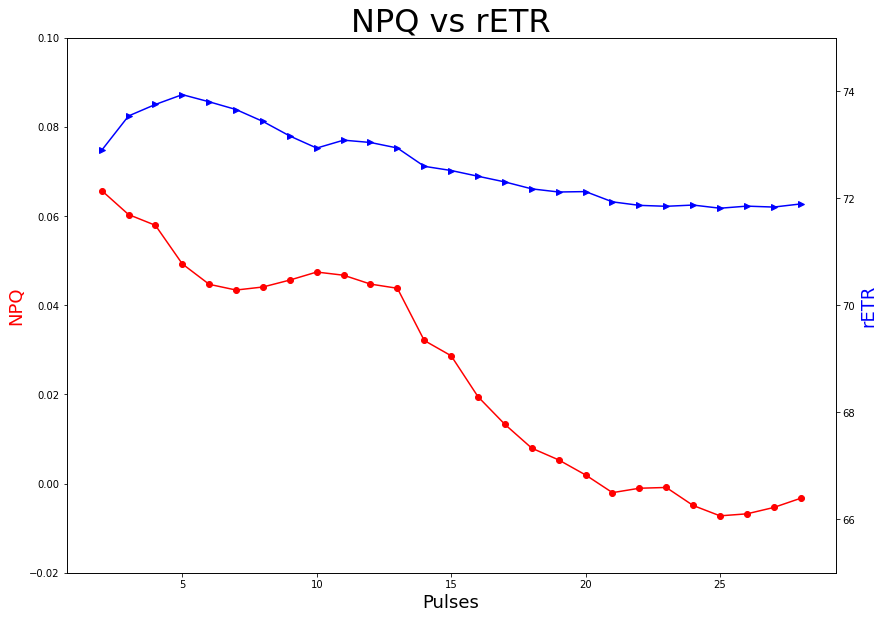

In [113]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(35*cm, 25*cm))
plt.title('NPQ vs rETR', fontsize= 32)
ax.plot(new_value['NPQ'], color = 'red', marker = 'o')
ax.set_xlabel('Pulses', fontsize = 18)
ax.set_ylabel('NPQ', color = 'red', fontsize = 18)
plt.ylim(ymin = -0.02, ymax = 0.10)
ax2 = ax.twinx()
ax2.plot(new_value['rETR'], color = 'blue', marker = '>')
ax2.set_ylabel('rETR', color = 'blue', fontsize = 18)
plt.ylim(ymin = 65, ymax = 75)
plt.show()